In [54]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#load the raw data
data = pd.read_excel('../data/raw/raw_data.xlsx')
data.head().T

,0,1,2,3,4
CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
Count,1,1,1,1,1
Country,United States,United States,United States,United States,United States
State,California,California,California,California,California
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
Zip Code,90003,90005,90006,90010,90015
Lat Long,"33.964131, -118.272783","34.059281, -118.30742","34.048013, -118.293953","34.062125, -118.315709","34.039224, -118.266293"
Latitude,33.964131,34.059281,34.048013,34.062125,34.039224
Longitude,-118.272783,-118.30742,-118.293953,-118.315709,-118.266293
Gender,Male,Female,Female,Female,Male


In [56]:
#get data info
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   str    
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   str    
 3   State              7043 non-null   str    
 4   City               7043 non-null   str    
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   str    
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   str    
 10  Senior Citizen     7043 non-null   str    
 11  Partner            7043 non-null   str    
 12  Dependents         7043 non-null   str    
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   str    
 15  Multiple Lines     7043 non-null   str    
 16  Internet Service   7043 non-null   

In [57]:
#drop unnecessary columns
cols_to_drop = ['CustomerID', 'Count', 'Country', 'State', 'Lat Long', 'Churn Label', 'Churn Score', 'Churn Reason']
data.drop(columns=cols_to_drop, inplace=True)

In [58]:
#count unique values for city and zip code
print(f"Unique Cities: {data['City'].nunique()}")
print(f"Unique Zip Codes: {data['Zip Code'].nunique()}")

Unique Cities: 1129
Unique Zip Codes: 1652


In [59]:
#drop city and zip code as there are too many unique values to categorize
data.drop(columns=['City', 'Zip Code'], inplace=True)

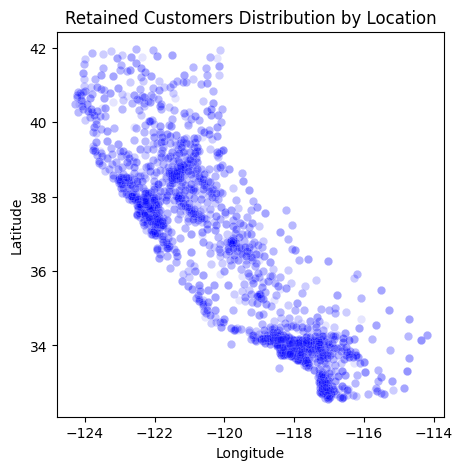

In [60]:
#create a scatter plot for retained customers wrt to longitude and latitude
plt.figure(figsize=(5,5))
sns.scatterplot(data=data[data['Churn Value'] == 0], x='Longitude', y='Latitude', color='blue', alpha=0.1)
plt.title('Retained Customers Distribution by Location')
plt.show()

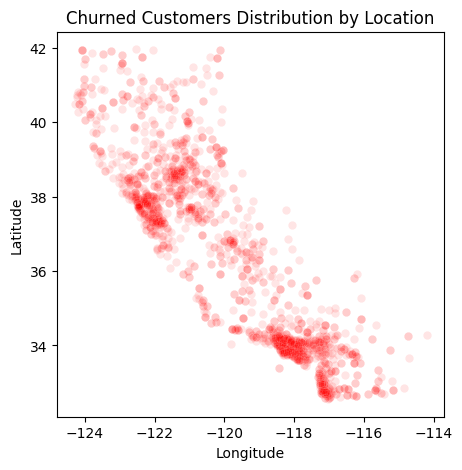

In [61]:
#create a scatter plot for churned customers wrt to longitude and latitude
plt.figure(figsize=(5,5))
sns.scatterplot(data=data[data['Churn Value'] == 1], x='Longitude', y='Latitude', color='red', alpha=0.1)
plt.title('Churned Customers Distribution by Location')
plt.show()

In [62]:
#drop longitude and latitude columns as they do not provide significant insights
data.drop(columns=['Longitude', 'Latitude'], inplace=True)
data.head().T

,0,1,2,3,4
Gender,Male,Female,Female,Female,Male
Senior Citizen,No,No,No,No,No
Partner,No,No,No,Yes,No
Dependents,No,Yes,Yes,Yes,Yes
Tenure Months,2,2,8,28,49
Phone Service,Yes,Yes,Yes,Yes,Yes
Multiple Lines,No,No,Yes,Yes,Yes
Internet Service,DSL,Fiber optic,Fiber optic,Fiber optic,Fiber optic
Online Security,Yes,No,No,No,No
Online Backup,Yes,No,No,No,Yes


In [63]:
#get basic info about the updated data
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   str    
 1   Senior Citizen     7043 non-null   str    
 2   Partner            7043 non-null   str    
 3   Dependents         7043 non-null   str    
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   str    
 6   Multiple Lines     7043 non-null   str    
 7   Internet Service   7043 non-null   str    
 8   Online Security    7043 non-null   str    
 9   Online Backup      7043 non-null   str    
 10  Device Protection  7043 non-null   str    
 11  Tech Support       7043 non-null   str    
 12  Streaming TV       7043 non-null   str    
 13  Streaming Movies   7043 non-null   str    
 14  Contract           7043 non-null   str    
 15  Paperless Billing  7043 non-null   str    
 16  Payment Method     7043 non-null   

In [64]:
#count unique values in each column and print them if they are less than 6
for col in data.columns:
    unique_values = data[col].nunique()
    print(f"{col}: {unique_values} unique values")
    if unique_values <= 5:
        for val in data[col].unique():
            print(f"- {val}")
    print()

Gender: 2 unique values
- Male
- Female

Senior Citizen: 2 unique values
- No
- Yes

Partner: 2 unique values
- No
- Yes

Dependents: 2 unique values
- No
- Yes

Tenure Months: 73 unique values

Phone Service: 2 unique values
- Yes
- No

Multiple Lines: 3 unique values
- No
- Yes
- No phone service

Internet Service: 3 unique values
- DSL
- Fiber optic
- No

Online Security: 3 unique values
- Yes
- No
- No internet service

Online Backup: 3 unique values
- Yes
- No
- No internet service

Device Protection: 3 unique values
- No
- Yes
- No internet service

Tech Support: 3 unique values
- No
- Yes
- No internet service

Streaming TV: 3 unique values
- No
- Yes
- No internet service

Streaming Movies: 3 unique values
- No
- Yes
- No internet service

Contract: 3 unique values
- Month-to-month
- Two year
- One year

Paperless Billing: 2 unique values
- Yes
- No

Payment Method: 4 unique values
- Mailed check
- Electronic check
- Bank transfer (automatic)
- Credit card (automatic)

Monthly 

In [65]:
#clean values with extra (unnecessary) terms for binary categorical columns
binary_cols_with_extra_terms = {
    'Multiple Lines': 'No phone service',
    'Online Security': 'No internet service',
    'Online Backup': 'No internet service',
    'Device Protection': 'No internet service',
    'Tech Support': 'No internet service',
    'Streaming TV': 'No internet service',
    'Streaming Movies': 'No internet service'
}

for col, extra_term in binary_cols_with_extra_terms.items():
    data[col] = data[col].replace(extra_term, 'No')

In [66]:
#count unique values again for updated binary categorical columns
for col in binary_cols_with_extra_terms.keys():
    unique_values = data[col].nunique()
    print(f"{col}: {unique_values} unique values")
    if unique_values != 2:
        print("Error: More than 2 unique values found!")
        for val in data[col].unique():
            print(f"- {val}")
    print()

Multiple Lines: 2 unique values

Online Security: 2 unique values

Online Backup: 2 unique values

Device Protection: 2 unique values

Tech Support: 2 unique values

Streaming TV: 2 unique values

Streaming Movies: 2 unique values



In [67]:
#get basic info about the updated data
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   str    
 1   Senior Citizen     7043 non-null   str    
 2   Partner            7043 non-null   str    
 3   Dependents         7043 non-null   str    
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   str    
 6   Multiple Lines     7043 non-null   str    
 7   Internet Service   7043 non-null   str    
 8   Online Security    7043 non-null   str    
 9   Online Backup      7043 non-null   str    
 10  Device Protection  7043 non-null   str    
 11  Tech Support       7043 non-null   str    
 12  Streaming TV       7043 non-null   str    
 13  Streaming Movies   7043 non-null   str    
 14  Contract           7043 non-null   str    
 15  Paperless Billing  7043 non-null   str    
 16  Payment Method     7043 non-null   

In [68]:
#convert total charges to float
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
type(data['Total Charges'].iloc[0])

numpy.float64

In [69]:
#get basic info about the updated total charges column
data['Total Charges'].info()

<class 'pandas.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Total Charges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [70]:
#display rows with missing total charges
data[data['Total Charges'].isnull()]

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
2234,Female,No,Yes,No,0,No,No,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,2578
2438,Male,No,No,No,0,Yes,No,No,No,No,...,No,No,No,Two year,No,Mailed check,20.25,NaN,0,5504
2568,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0,2048
2667,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,...,No,No,No,Two year,No,Mailed check,25.75,NaN,0,4950
2856,Female,No,Yes,No,0,No,No,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0,4740
4331,Male,No,Yes,Yes,0,Yes,No,No,No,No,...,No,No,No,Two year,No,Mailed check,19.85,NaN,0,2019
4687,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,...,No,No,No,Two year,No,Mailed check,25.35,NaN,0,2299
5104,Female,No,Yes,Yes,0,Yes,No,No,No,No,...,No,No,No,Two year,No,Mailed check,20.00,NaN,0,3763
5719,Male,No,Yes,Yes,0,Yes,No,No,No,No,...,No,No,No,One year,Yes,Mailed check,19.70,NaN,0,4890
6772,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0,2342


In [71]:
#replace missing total charges with 0 since all these customers have tenure 0
data['Total Charges'] = data['Total Charges'].fillna(0)

In [72]:
#get basic info about the updated total charges column
data['Total Charges'].info()

<class 'pandas.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Total Charges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [74]:
#save the cleaned data to data/interim/cleaned_data.xlsx
data.to_excel('../data/interim/cleaned_data.xlsx', index=False)